# Exponential Integrate-and-Fire model

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from random import gauss
from random import randint
from random import random

## ELIF:
    τ ·du/dt = F ( u ) + R · I ( t ); If firing: ( u = u_reset )
    F ( u ) = −( u − u_rest ) + ∆T.exp((u − θrh)/∆T)
    
       The first term describes the leak of a passive membrane.                                                   
       The second term is an exponential nonlinearity.                                                            
       ∆T is the sharpness parameter.                                                                             
       θrh is the firing threshold.  

In [3]:
def ELIF(I_init=0.005, gl=0.16, Cm=0.0049, num = 1):

    ######### Constants
    U_rest      =   -0.065                     
    U_reset     =   -0.065
    thresh  =   -0.05                          
    delta = 0.01                               #is the sharpness parameter
    tau =  Cm/gl

    ######### Setup
    # TIME
    T       =   0.100                       
    dt      =   0.00002                    
    time    =   np.arange(0, T+dt, dt)      
    # VOLTAGE
    U       =   np.empty(len(time))        
    U[0]    =   U_rest                         
    # CURRENT
    I = I_values(I_init=I_init, time=time,num = num)
    ######### Measurements
    spikes  =   0                           # counter for number of spikes
    t = time[1000]
    ts = 0
    ######### Simulation
    for i in range(1, len(time)): 
        # use " tau.(du/dt) = -(U(t) -U_rest)+ ∆T.exp((u − θrh)/∆T + R.I(t))" to get this equation
        U[i] = (((U_rest - U[i-1]) +delta*math.exp((U[i-1]-thresh)/delta) + I[i]/gl)*dt)/tau + U[i-1]
        
        # in case we exceed threshold
        if U[i] >= 0.04:
            U[i-1] = 0.04   # set the last step to spike value
            U[i] = U_reset  # current step is resting membrane potential
            ts = time[i]-t
            t = time[i]
            spikes += 1     # count spike
            
    
    return U , ts , I

def I_values(I_init=0.005, time=None,num = 1):
    I0 = np.zeros(len(time))
    I0[1000:4000] = I_init
    I1 = []
    I2 = []
    #Setting the initial current_ I1 
    for i in range(0, len(time)):
        
        var = gauss(I_init,I_init*0.1)
        I1.append(var)

    #Setting the initial current_ I2
    for i in range(0, len(time)):
        
        var = ((math.cos(i/100)+1)/4)*((math.sin(i/300)+1)/4)*(gauss(0,0.4*I_init))+I_init
        I2.append(var)
                    
    
    I = [I0,I1,I2]
    
        
    return I[num-1]

### (F - I ) curve plot
    we can have different (F-I) curve plot by changing the amount of τ  (using of C , R=1/gl  =>  τ =R.C)
    we compute frequency of our model based on different amount of current => I :[0,0.1]V

In [4]:
def FI_curve(g,C):
    F = []
    #compute Frequency based on different amount of constant current I
    I_inp= np.arange(0,0.1001,0.0001)
    for i in I_inp:
        U,ts,I = ELIF(I_init=i , gl=g, Cm=C) 
        F.append(1/(0.005+ts)) if ts>0 else F.append(ts)



    fig1 = plt.figure("Exponential Integrate-and-Fire Neuron", figsize=(10, 7))
    plt.subplot(111)
    plt.title("Exponential Integrate-and-Fire Neuron Model")
    fig1.subplots_adjust(left=0.1, bottom=0.32)

    # plot lines
    plt.plot(I_inp,F,'r--',label="F-I curve")
    plt.legend(loc="lower right")

    # add axis labels
    plt.ylabel("f (1/T)")
    plt.xlabel("I (V)")
    

### ELIF Neuron Simulation for constant current
    we implement (U - t) and (I - t) diagram in one frame ,we assume U_rest= - 65mv and threshold = -50 mv### 

In [5]:
def ELIF_Model(I_init,gl_init,Cm_init):
    # time parameters for plotting
    T       =   0.100                       # total simulation length [s]
    dt      =   0.00002                     # step size [s]
    time    =   np.arange(0, T+dt, dt)      # step values [s]

    
    # update functions for lines
    U , ts , I= ELIF(I_init=I_init, gl=gl_init, Cm=Cm_init)
    thresh = np.zeros(len(time))
    thresh[0:5001] = -0.05

    ######### Plotting
    fig = plt.figure("Exponential Integrate-and-Fire Neuron", figsize=(14, 7))
    plt.subplot(111)
    plt.title("Exponential Integrate-and-Fire Neuron Model")
    fig.subplots_adjust(left=0.1, bottom=0.32)

    # plot lines
    plt.plot(time,thresh,'r--' ,label="thresh")[0]
    plt.plot(time, U, label="Potential:U")[0]
    plt.plot(time, I, label="Applied Current:I")[0]
    plt.legend(loc="upper right")

    # add axis labels
    plt.ylabel("Potential [V]")
    plt.xlabel("Time [s]")
    

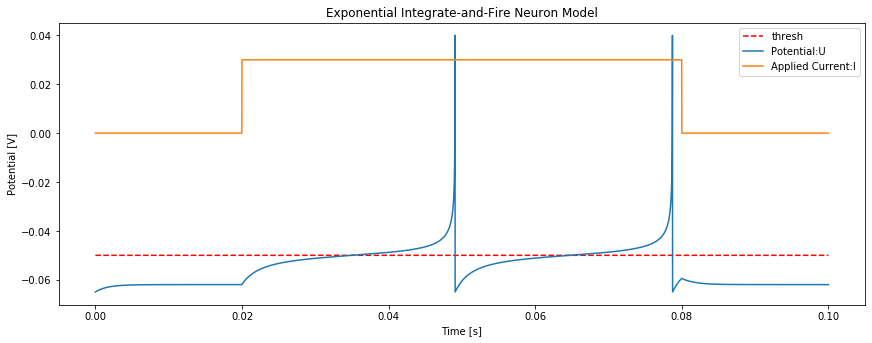

In [6]:
ELIF_Model(0.03,5.7,0.0067)

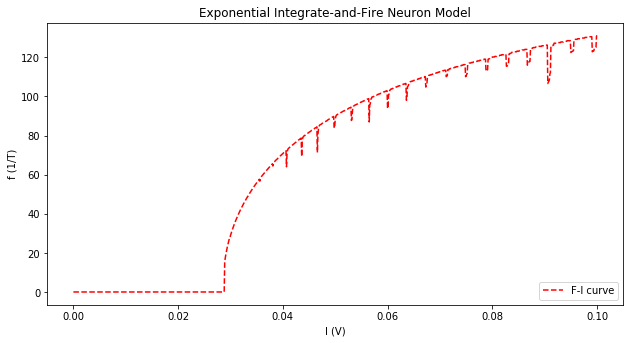

In [7]:
FI_curve(5.7,0.0067)

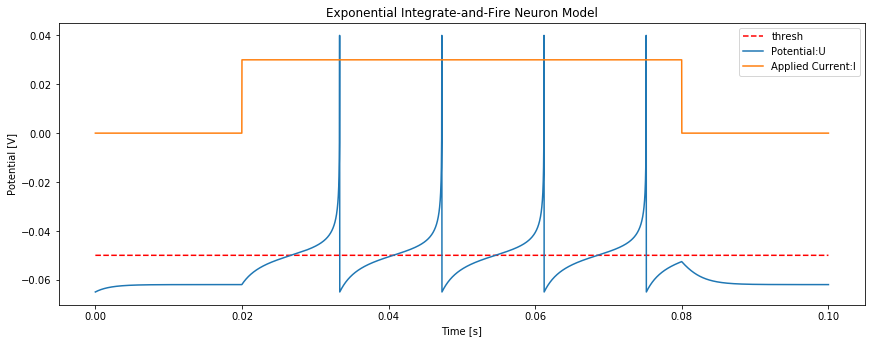

In [8]:
ELIF_Model(0.03,4.7,0.0067)

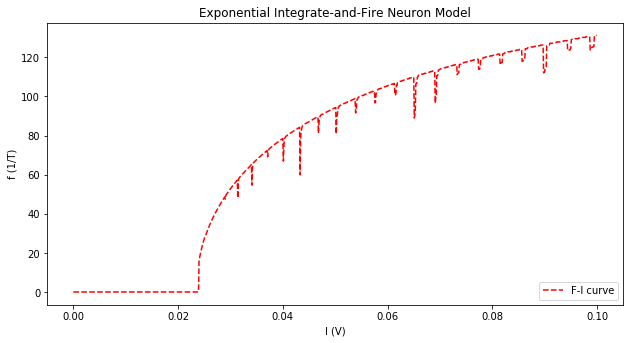

In [9]:
FI_curve(4.7,0.0067)

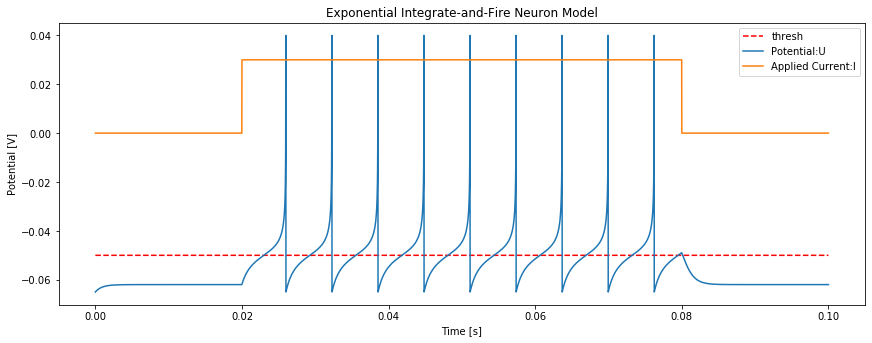

In [10]:
ELIF_Model(0.03,4.7,0.003)

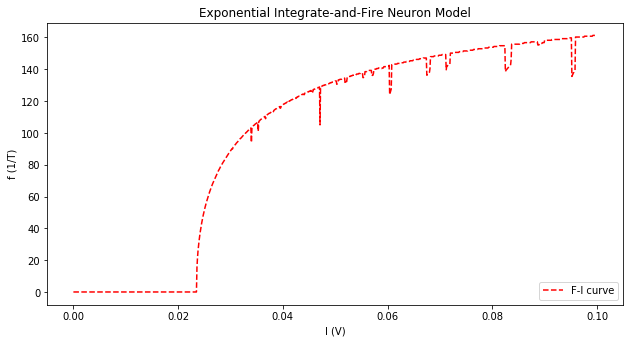

In [11]:
FI_curve(4.7,0.003)

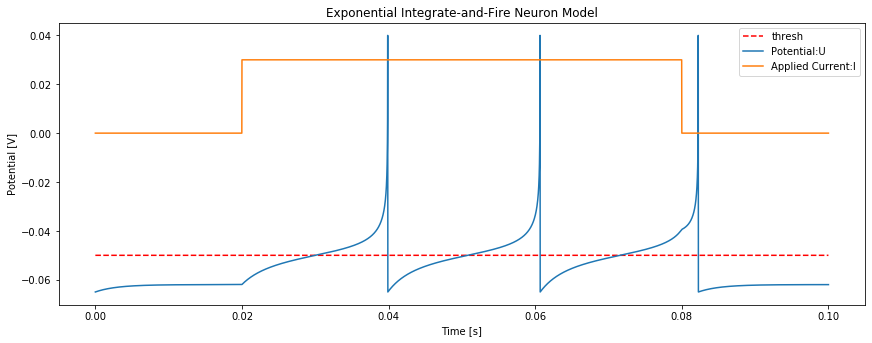

In [12]:
ELIF_Model(0.03,4.7,0.01)

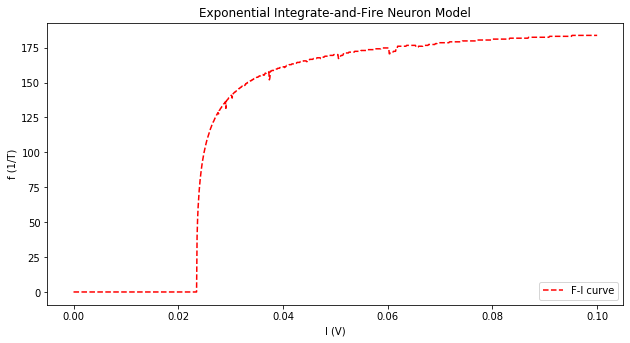

In [13]:
FI_curve(4.7,0.001)

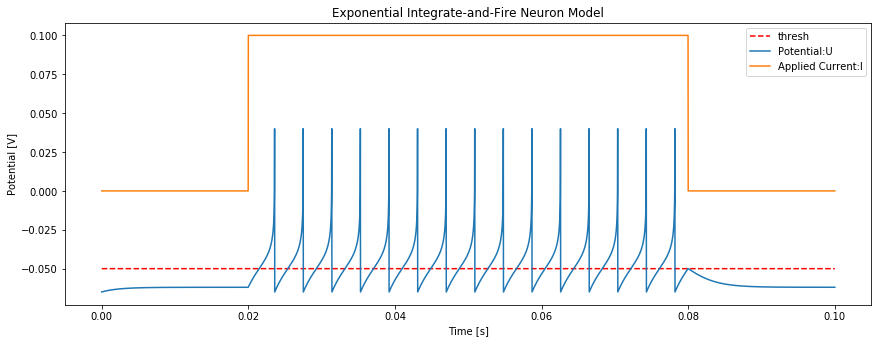

In [14]:
ELIF_Model(0.1,6,0.01)

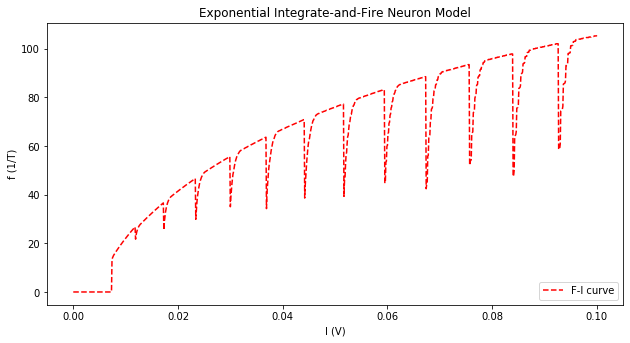

In [15]:
FI_curve(1,0.01)

## ELIF Neuron Simulation for Variable current based on time

In [16]:
def ELIF_Model2(I_init,gl_init,Cm_init,num_init):
    # time parameters for plotting
    T       =   0.100                       # total simulation length [s]
    dt      =   0.00002                     # step size [s]
    time    =   np.arange(0, T+dt, dt)      # step values [s]

    # update functions for lines
    V ,ts ,I = ELIF(I_init=I_init, gl=gl_init, Cm=Cm_init, num=num_init)
    thresh = np.zeros(len(time))
    thresh[0:5001] = -0.04

    ######### Plotting
    fig = plt.figure("Exponential Integrate-and-Fire Neuron", figsize=(14, 14))
    fig.subplots_adjust(left=0.1, bottom=0.32)

    # plot lines
    plt.subplot(211)
    plt.title("Exponential Integrate-and-Fire Neuron Model")
    plt.plot(time,thresh,'r--' ,label="thresh")[0]
    #plt.plot(time, I, label="Applied Current:I")[0]
    plt.plot(time, V, label="Potential:U")[0]
    plt.legend(loc="upper right")

    # add axis labels
    plt.ylabel("Potential [V]")
    
    plt.subplot(212)
    plt.plot(time, I, label="Applied Current:I")
    plt.legend(loc="upper right")

    # add axis labels
    plt.ylabel("I(t) [V]")
    plt.xlabel("Time [s]")

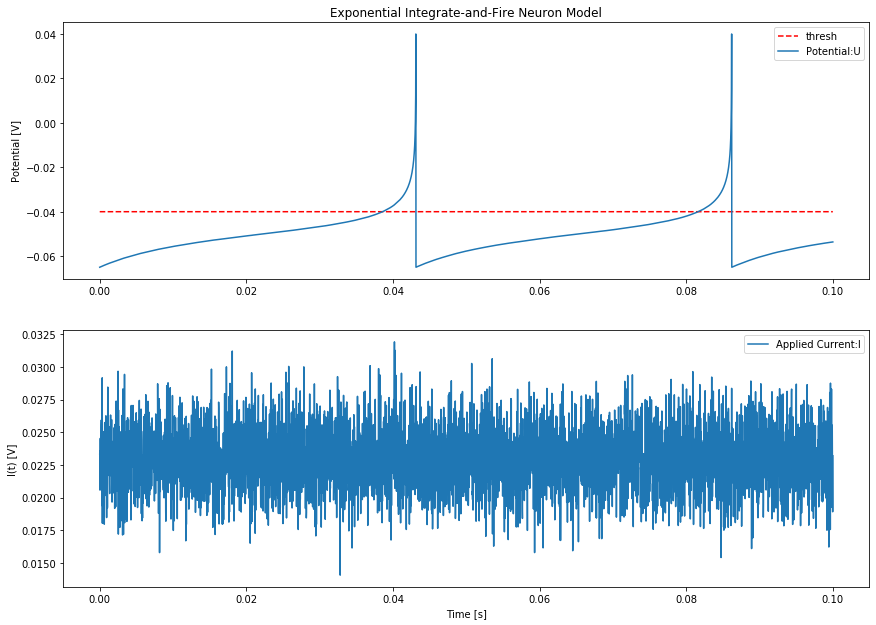

In [17]:
ELIF_Model2(0.023,3,0.02,2)

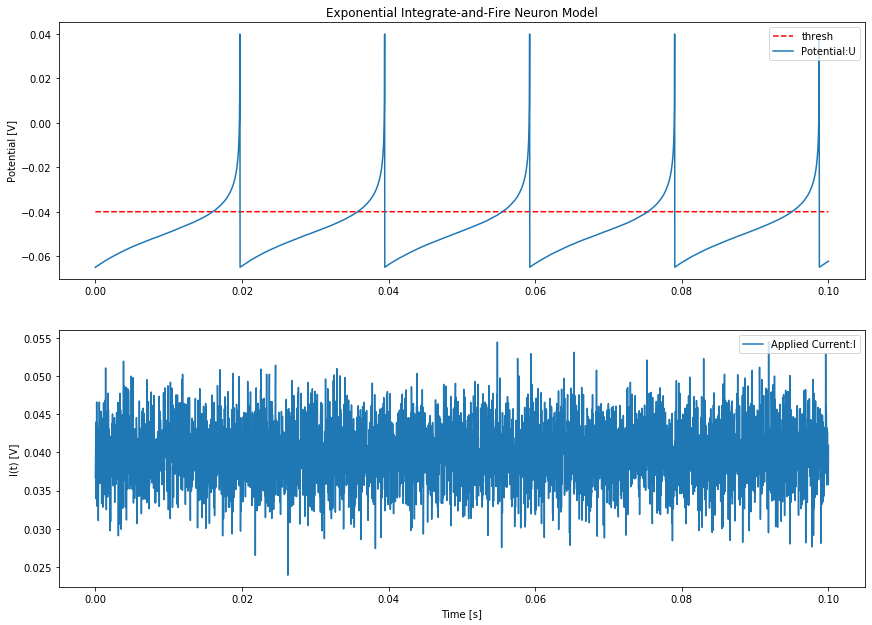

In [18]:
ELIF_Model2(0.04,3,0.02,2)

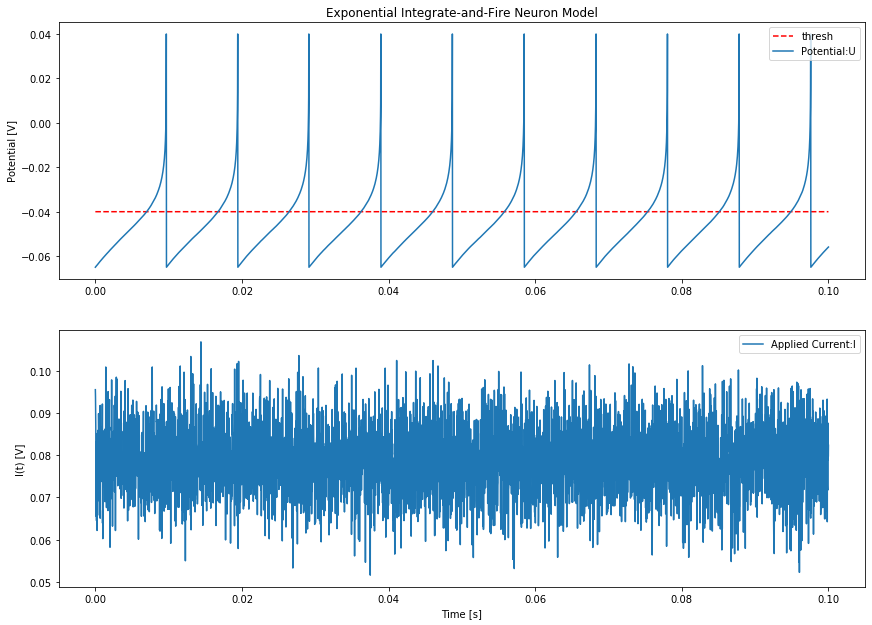

In [19]:
ELIF_Model2(0.079,3,0.02,2)

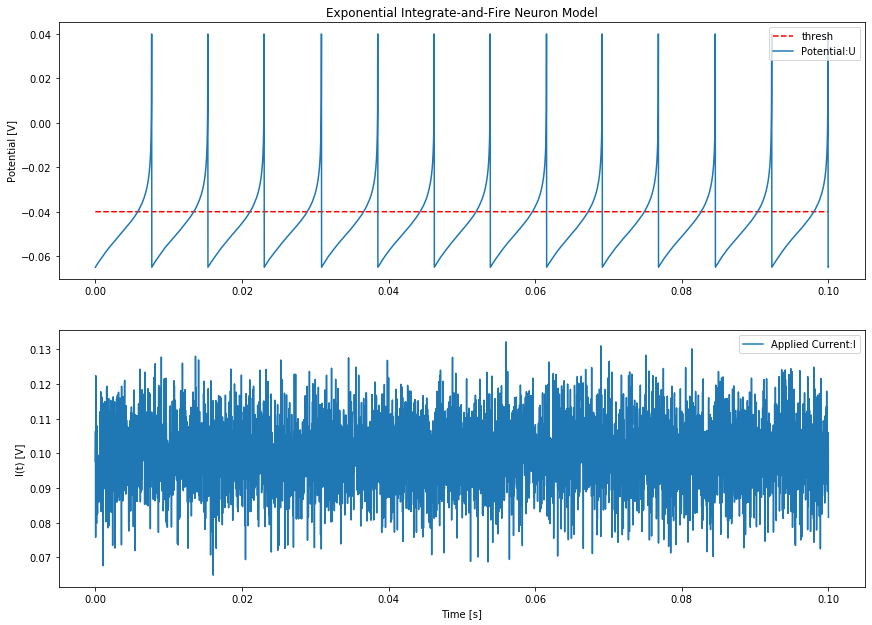

In [20]:
ELIF_Model2(0.1,4.7,0.02,2)

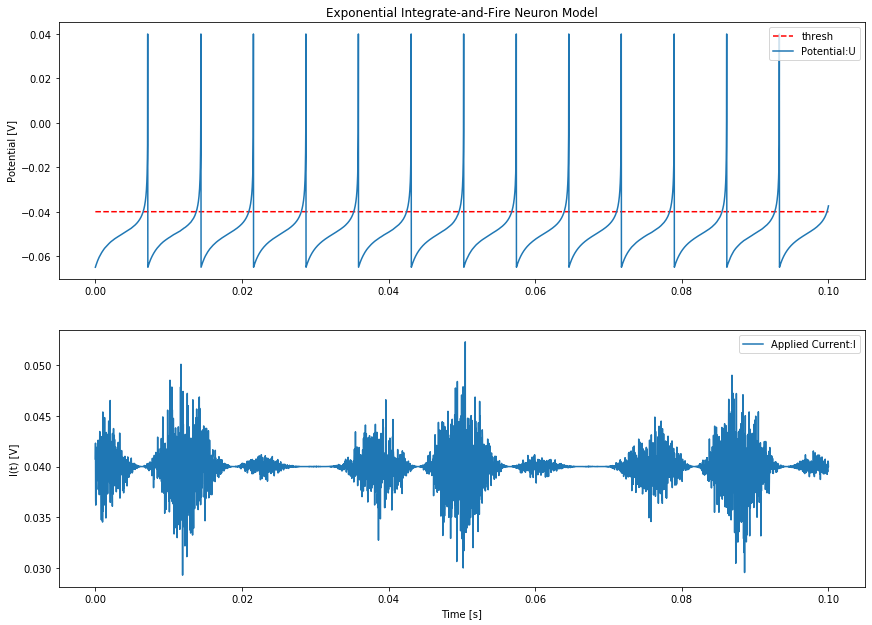

In [21]:
ELIF_Model2(0.04,6,0.0049,3)

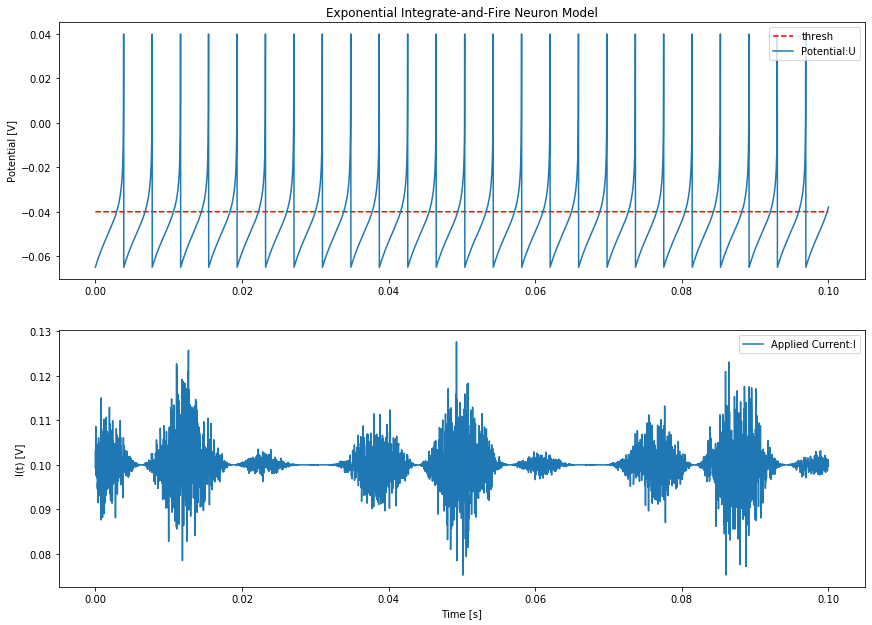

In [22]:
ELIF_Model2(0.1,5,0.01,3)